In [4]:
!wget http://images.cocodataset.org/zips/train2017.zip
# !unzip -q train2017.zip -d /content/

--2025-09-24 22:35:42--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.233.17, 52.217.143.17, 16.15.218.213, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.233.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip.1’

train2017.zip.1     100%[===================>]  18.01G  57.1MB/s    in 5m 50s  

2025-09-24 22:41:32 (52.8 MB/s) - ‘train2017.zip.1’ saved [19336861798/19336861798]

[train2017.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of train2017.zip or
        train2017.zip.zip, and cannot find train2017.zip.ZIP, period.


In [5]:
!unzip -q train2017.zip.1 -d /content/

In [2]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [3]:
class CocoImages(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.image_files = os.listdir(image_folder)
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_folder, img_name)

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, img_name


In [4]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

In [5]:
coco_path = "/content/train2017"
coco_dataset = CocoImages(coco_path, transform=transform)

coco_loader = DataLoader(
    coco_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

In [6]:
images, names = next(iter(coco_loader))
print("Batch shape:", images.shape)
print("First image file:", names[0])

Batch shape: torch.Size([32, 3, 256, 256])
First image file: 000000464951.jpg


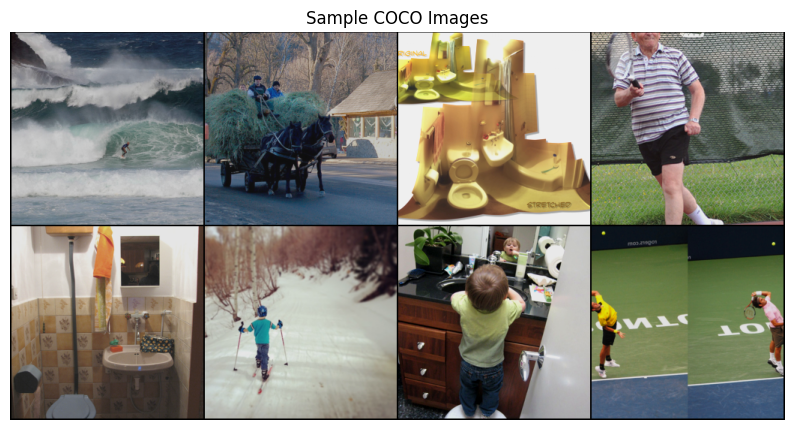

File names: ('000000563160.jpg', '000000173124.jpg', '000000417234.jpg', '000000288180.jpg', '000000410301.jpg', '000000016255.jpg', '000000230735.jpg', '000000471117.jpg')


In [7]:
import matplotlib.pyplot as plt
import torchvision

images, names = next(iter(coco_loader))

grid = torchvision.utils.make_grid(images[:8], nrow=4, normalize=True, value_range=(-1,1))

plt.figure(figsize=(10, 6))
plt.imshow(grid.permute(1, 2, 0))  # CHW -> HWC
plt.axis("off")
plt.title("Sample COCO Images")
plt.show()

print("File names:", names[:8])
